**Restaurant Reviews Sentiment Analysis using Stemming and Bag of Words**

# In this notebook, I have made an attempt to get a simple text classification model up and running. In this, restaurant review data from Kaggle (also available in UCI ML Library) was used to  perform Sentiment Analysis using Stemming and Bag of Words model to classify reviews into two sentiments — Liked(1) and Disliked(0).

**Since, the data is fairly balanced, we are only concerned with accuracy_score. From various Classifiers, highest accuracy achieved was 81% with cross_val_score of 79.4% with Voting Classifier 2 (# VCLF2).**

# Importing the Libraries and reading the tsv data file

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
#title input file is in tsv format
data=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) 
#delimeter or sep='\t' 
#quoting =3 no quote or ignore quotes while processing

In [23]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [24]:
data.shape

(1000, 2)

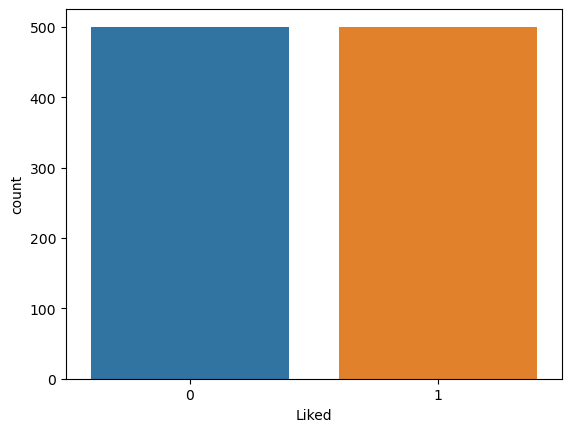

In [22]:
import seaborn as sns
sns.countplot(x='Liked', data=data)
plt.show()

In [4]:
good_reviews_count = len(data.loc[data['Liked'] == 1])
bad_reviews_count=len(data.loc[data['Liked']==0])
(good_reviews_count, good_reviews_count)

(500, 500)

**So, the dataset is a balanced dataset. The number of '1's and '0's are equal.**

# Data Cleaning

In [31]:
#Data Cleaning
# Cleaning the Text
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zish0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zish0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
text = "not a good food it is"
for w in text:
    if not w in set(all_stopwords):
        w.lower()
        print(w)
        

n
 
 
g
 
f
 
 


In [39]:
corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') 
    #remove negative word 'not' as it is closest word to help determine whether the review is good or not 
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Create a BOW Model

In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [48]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [49]:
import pickle
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('countvector.pkl', 'wb'))

# Train, Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Classifier Model Training

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### 1.Logistic Regression

In [51]:
#Logistic Regression
lr = LogisticRegression(random_state=0, C=0.82286, max_iter=2000, solver='lbfgs')
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)

[0.7761194  0.82089552 0.73134328 0.80597015 0.7761194  0.74626866
 0.8358209  0.88059701 0.78787879 0.77272727 0.90909091 0.77272727]
80.12965475652042
The accuracy of the Logistic Regression is 78.0
[[81 16]
 [28 75]]


#### 2.Naive Bayes

In [52]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print(cm)

[0.67164179 0.68656716 0.76119403 0.70149254 0.68656716 0.65671642
 0.73134328 0.7761194  0.63636364 0.65151515 0.78787879 0.72727273]
70.62226745062567
The accuracy of the Naive Bayes is 74.0
[[60 37]
 [15 88]]


In [53]:
#MultinomialNB
mnb = MultinomialNB(alpha=2)
cv = cross_val_score(mnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_mnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_mnb)
print(cm)

[0.76119403 0.80597015 0.71641791 0.79104478 0.79104478 0.71641791
 0.79104478 0.82089552 0.78787879 0.77272727 0.87878788 0.84848485]
79.01590532187547
The accuracy of the Naive Bayes is 79.0
[[78 19]
 [23 80]]


In [14]:
#Bernoulli NB
bnb = BernoulliNB(alpha=10)
cv = cross_val_score(bnb,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_bnb=mnb.predict(X_test)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(y_pred_bnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_bnb)
print(cm)

[0.74626866 0.80597015 0.79104478 0.7761194  0.7761194  0.76119403
 0.80597015 0.80597015 0.77272727 0.78787879 0.87878788 0.78787879]
79.13274536408863
The accuracy of the Naive Bayes is 79.0
[[78 19]
 [23 80]]


#### 3.Random Forest Classifier

In [54]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)

[0.79104478 0.80597015 0.76119403 0.80597015 0.7761194  0.80597015
 0.7761194  0.76119403 0.8030303  0.75757576 0.90909091 0.83333333]
79.8884366048545
The accuracy of the RandomForestClassifier is 80.0
[[88  9]
 [31 72]]


#### 4.SVC

In [55]:
#Linear SVC
svcl = SVC(kernel = 'linear', random_state = 0, probability=True)
svcl.fit(X_train, y_train)
cv = cross_val_score(svcl,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svcl = svcl.predict(X_test)
print('The accuracy of the Linear SVC is',metrics.accuracy_score(y_pred_svcl,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svcl)
print(cm)

[0.7761194  0.82089552 0.74626866 0.79104478 0.7761194  0.76119403
 0.82089552 0.88059701 0.75757576 0.72727273 0.83333333 0.74242424]
78.61450324136891
The accuracy of the Linear SVC is 79.0
[[79 18]
 [24 79]]


In [17]:
#rbf SVC
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0, probability=True)
svck.fit(X_train, y_train)
cv = cross_val_score(svck,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_svck = svck.predict(X_test)
print('The accuracy of the Kernel SVC is',metrics.accuracy_score(y_pred_svck,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svck)
print(cm)

[0.7761194  0.80597015 0.74626866 0.79104478 0.79104478 0.80597015
 0.80597015 0.79104478 0.75757576 0.74242424 0.89393939 0.83333333]
79.50587969244687
The accuracy of the Kernel SVC is 78.0
[[89  8]
 [36 67]]


#### Voting Classifier

In [18]:
#VCLF 
voting_clf = VotingClassifier(estimators = [('lr', lr),('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft') 
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('The accuracy of the Voting Classifier is',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print(cm)
print(classification_report(y_test, y_pred_vclf))

[0.68656716 0.80597015 0.7761194  0.76119403 0.79104478 0.8358209
 0.8358209  0.86567164 0.71212121 0.78787879 0.87878788 0.78787879]
79.37396351575455
The accuracy of the Voting Classifier is 81.0
[[79 18]
 [20 83]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.82      0.81      0.81       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [19]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'voting_clf.pkl'
pickle.dump(voting_clf, open(filename, 'wb'))

# Since, the data is fairly balanced, we are only concerned with accuracy_score. From above distinct classifiers and various Voting Classifier combinations, highest accuracy achieved was 81% with cross_val_score of 79.4% with Voting Classifier. 